# Data processing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.backends.backend_pdf import PdfPages

Load the data

In [2]:
data = pd.read_csv("../Original_Data/9_PODLASKIE.csv", usecols=[1, 2, 3, 4, 5])

Check for possible values

In [3]:
data = data.rename(columns={"Wiek kupującego": "Wiek", "Płeć kupującego": "Płeć"})

for col in data.columns:
    print(f"Column variable: {col}")
    print(f"Possible values: " + ", ".join([str(elem) for elem in data[col].unique()]))
    print()

Column variable: Dni od zakupu
Possible values: 4, 3, 6, 11, 10, 12, 5, 8, 9, 7, 15, 2, 13, 1, 0, 14, 18

Column variable: Marka
Possible values: Beko, Electrolux, Dyson, Tefal, Samsung

Column variable: Wiek
Possible values: 29.0, 39.0, 49.0, 41.0, 40.0, 37.0, nan, 45.0, 31.0, 21.0, 64.0, 35.0, 60.0, 28.0, 51.0, 56.0, 48.0, 33.0, 32.0, 38.0, 57.0, 50.0, 47.0, 46.0, 22.0, 54.0, 52.0, 27.0, 23.0, 36.0, 24.0, 43.0, 30.0, 44.0, 34.0, 55.0, 62.0, 53.0, 58.0, 25.0, 26.0, 59.0, 19.0, 61.0, 74.0, 42.0, 68.0, 18.0, 20.0

Column variable: Płeć
Possible values: bd., M, K

Column variable: Ocena
Possible values: 4.5, 2.5, 2.0, 3.5, 3.0, 1.5, 5.0, 4.0, 0.5, 1.0, 0.0



Correct invalid values

In [4]:
data["Płeć"] = data["Płeć"].map({val: val for val in data["Płeć"].unique() if val != "bd."})
data

,Dni od zakupu,Marka,Wiek,Płeć,Ocena
0,4,Beko,29.0,NaN,4.5
1,3,Electrolux,39.0,M,2.5
2,6,Electrolux,49.0,NaN,2.0
3,3,Beko,41.0,M,3.5
4,11,Electrolux,40.0,NaN,3.0
...,...,...,...,...,...
461,9,Samsung,42.0,M,1.5
462,5,Beko,46.0,NaN,2.0
463,10,Samsung,52.0,M,3.0
464,9,Samsung,44.0,M,3.5


Save the cleaned data

In [5]:
data.to_csv(path_or_buf="../Analysis_Data/vacuum_cleaner_statistics_podlaskie.csv", index=False)

Final paper

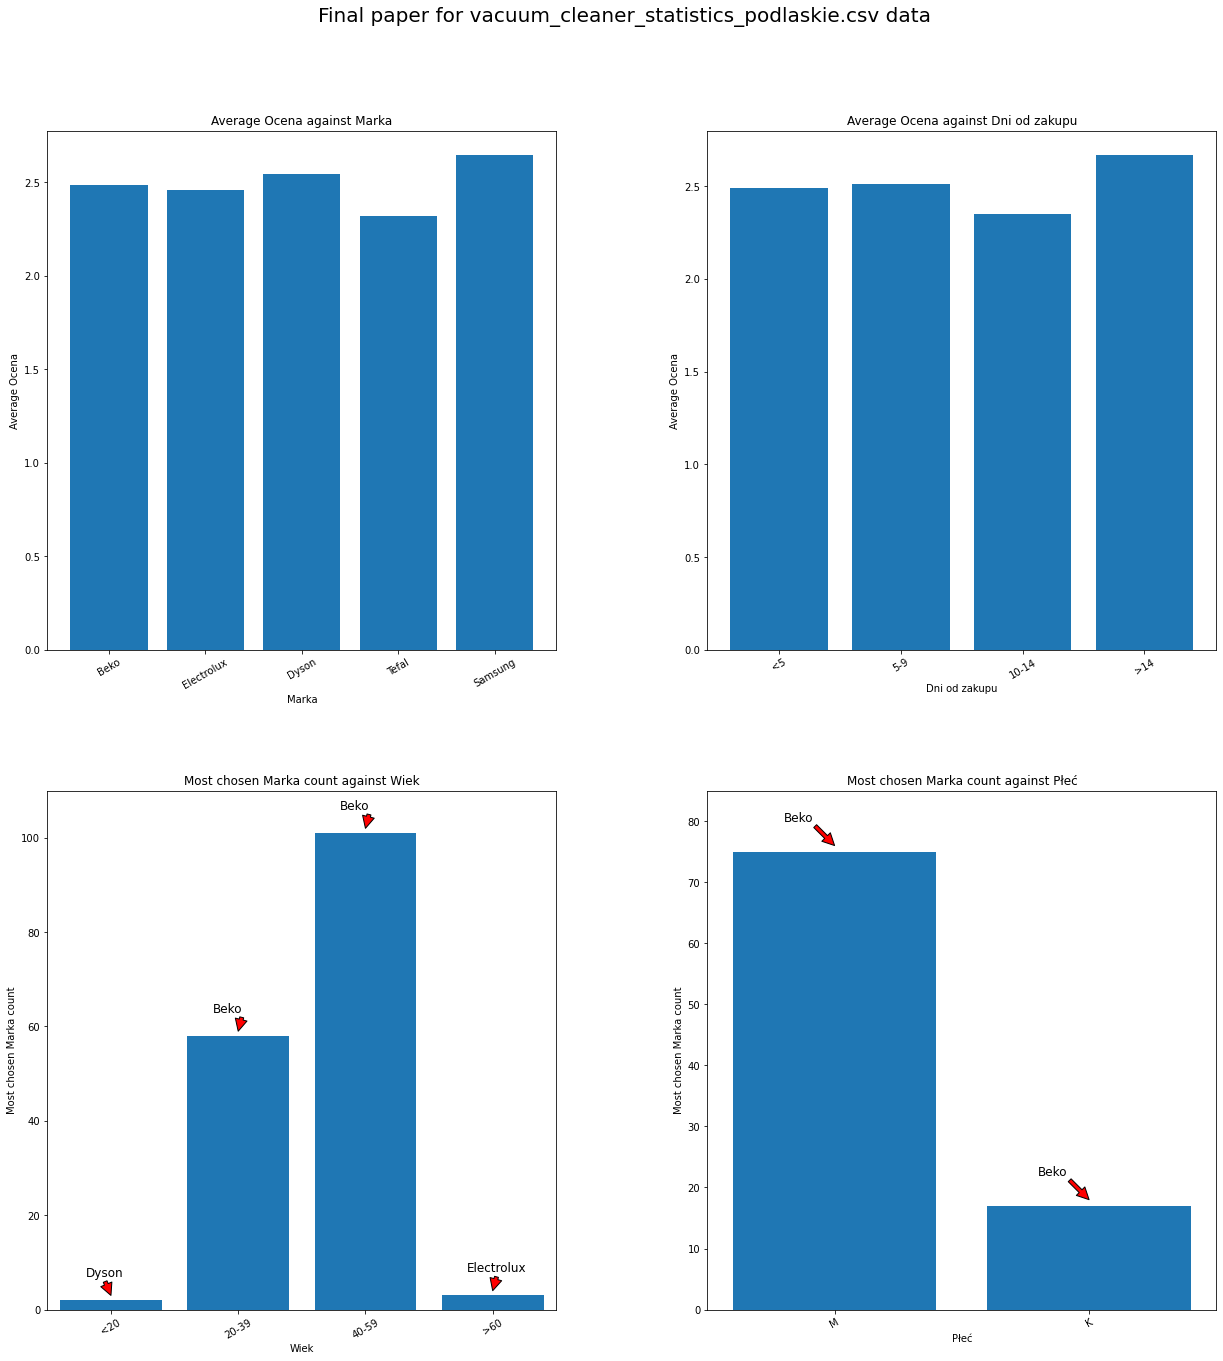

In [8]:
# Average Ocena against Marka
data_gb = data[["Marka", "Ocena"]].dropna()
brands = list(data_gb["Marka"].unique())
avg_gb = [data_gb.loc[data_gb["Marka"] == b]["Ocena"].mean() for b in brands]

# Average Ocena against Dni od zakupu
data_gd = data[["Dni od zakupu", "Ocena"]].dropna()
days = ["<5", "5-9", "10-14", ">14"]
avg_gd = [0] * 4
avg_gd[0] = data_gd.loc[data_gd["Dni od zakupu"] < 5]
avg_gd[1] = data_gd.loc[(data_gd["Dni od zakupu"] >= 5) & (data_gd["Dni od zakupu"] < 10)]
avg_gd[2] = data_gd.loc[(data_gd["Dni od zakupu"] >= 10) & (data_gd["Dni od zakupu"] < 15)]
avg_gd[3] = data_gd.loc[data_gd["Dni od zakupu"] >= 15]
avg_gd = [agd["Ocena"].mean() for agd in avg_gd]

# Most chosen Marka against Wiek
data_ba = data[["Wiek", "Marka"]].dropna()
ages = ["<20", "20-39", "40-59", ">60"]
ba = [0] * 4
ba[0] = data_ba.loc[data_ba["Wiek"] < 20]
ba[1] = data_ba.loc[(data_ba["Wiek"] >= 20) & (data_ba["Wiek"] < 39)]
ba[2] = data_ba.loc[(data_ba["Wiek"] >= 40) & (data_ba["Wiek"] < 59)]
ba[3] = data_ba.loc[data_ba["Wiek"] >= 60]
ba_annotations = [b["Marka"].value_counts().index[0] for b in ba]
ba = [b["Marka"].value_counts()[0] for b in ba]

# Most chosen Marka against Płeć
data_bg = data[["Płeć", "Marka"]].dropna()
genders = list(data_bg["Płeć"].unique())
bg = [data_bg.loc[data_bg["Płeć"] == g] for g in genders]
bg_annotations = [b["Marka"].value_counts().index[0] for b in bg]
bg = [b["Marka"].value_counts()[0] for b in bg]

fig, ax = plt.subplots(2, 2, figsize=(20, 20))
fig.tight_layout(pad=12.0)
fig.suptitle("Final paper for vacuum_cleaner_statistics_podlaskie.csv data", fontsize=20, y=1.0)

ax[0, 0].bar(brands, avg_gb, tick_label=brands)
ax[0, 0].set_title("Average Ocena against Marka")
ax[0, 0].set_xlabel("Marka")
ax[0, 0].set_ylabel("Average Ocena")
ax[0, 0].set_xticklabels(brands, rotation=30)

ax[0, 1].bar(days, avg_gd, tick_label=days)
ax[0, 1].set_title("Average Ocena against Dni od zakupu")
ax[0, 1].set_xlabel("Dni od zakupu")
ax[0, 1].set_ylabel("Average Ocena")
ax[0, 1].set_xticklabels(days, rotation=30)

ax[1, 0].bar(ages, ba, tick_label=ages)
ax[1, 0].set_title("Most chosen Marka count against Wiek")
ax[1, 0].set_xlabel("Wiek")
ax[1, 0].set_ylabel("Most chosen Marka count")
ax[1, 0].set_xticklabels(ages, rotation=30)
ax[1, 0].axis([-0.5, 3.5, 0, 110])

for i in range(4):
    ax[1, 0].annotate(ba_annotations[i], (i, ba[i] + 1), xytext=(i - 0.2, ba[i] + 5),
                      arrowprops={'facecolor': 'red'}, fontsize=12)

ax[1, 1].bar(genders, bg, tick_label=genders)
ax[1, 1].set_title("Most chosen Marka count against Płeć")
ax[1, 1].set_xlabel("Płeć")
ax[1, 1].set_ylabel("Most chosen Marka count")
ax[1, 1].set_xticklabels(genders, rotation=30)
ax[1, 1].axis([-0.5, 1.5, 0, 85])

for i in range(2):
    ax[1, 1].annotate(bg_annotations[i], (i, bg[i] + 1), xytext=(i - 0.2, bg[i] + 5),
                      arrowprops={'facecolor': 'red'}, fontsize=12)
    
plt.show()

Beko has been the most chosen Marka.

In [7]:
with PdfPages("../Documents/final_paper.pdf") as pdf:
    pdf.savefig(fig)